In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
from networkx.drawing.nx_pydot import graphviz_layout, write_dot

In [2]:
class Node:
    def __init__(self, id = None):
        self.id = id
        self.color = 'white'
        self.predecessor = None
        self.distance = None
        self.neighbours = []
        self.f = None

class FIFO:
    def __init__(self):
        self.queue = []

    def enqueue(self, x):
        self.queue.insert(0, x)
    
    def dequeue(self):
        value =  self.queue.pop()
        print(value.id)
        return value
    
    def is_empty(self):
        return len(self.queue) == 0
    
    def head(self):
        return self.queue[-1]
    
class LIFO:
    def __init__(self):
        self.queue = []
    
    def enqueue(self, x):
        self.queue.append(x)
    
    def dequeue(self):
        value = self.queue.pop()
        print(value)
        return value
    
    def is_empty(self):
        return len(self.queue) == 0

class Graph:
    def __init__(self):
        self.letsgo = "yes"

    def add_vertices(self, v):
        self.root = Node(v[0])
        self.vertices = [self.root]
        for i in range(1, len(v)):
            self.vertices.append(Node(v[i]))
    
    def add_adj_nd(self, e):
        self.adj = []
        for e_ in e:
            a = e_[0]
            b = e_[1]
            v1 = self.vertices[a]
            v2 = self.vertices[b]
            v1.neighbours.append(v2)
            v2.neighbours.append(v1)
            self.adj.append([v1, v2])
    
  
    def display_non_directed(self):
        G = nx.Graph()

        for v in self.vertices:
            G.add_node(v.id, color = v.color)

        for adj in self.adj:
            G.add_edge(adj[0].id, adj[1].id)
        
        color_map = nx.get_node_attributes(G, "color")
        #print(color_map)

        for key in color_map:
            if color_map[key] == "white":
                color_map[key] = "lightgrey"

            typ_colors = [color_map.get(node) for node in G.nodes()]

        write_dot(G,'test.dot')
        pos = graphviz_layout(G, prog="dot")
        nx.draw(G, pos, with_labels = True, node_color = typ_colors, alpha=0.7)
        plt.show()


    def BFS(self, s):
        print("BFS:")
        print()
        Q = FIFO()
        vertices = [v for v in self.vertices if v.id != s]

        for v in vertices:
            v.color = 'white'
            v.distance = np.Infinity
            v.predecessor = None
        
        s = self.vertices[s]
        s.color = 'red'
        s.distance = 0
        s.predecessor = None
        Q.enqueue(s)

        self.display_non_directed()

        while Q.is_empty() is not True:
            u = Q.head()

            for v in u.neighbours:
                if v.color == 'white':
                    v.color = 'red'
                    v.distance = u.distance + 1
                    v.predecessor = u
                    Q.enqueue(v)

                    self.display_non_directed()

            Q.dequeue()
            u.color = 'black'
            self.display_non_directed()
    
    def DFS(self, s):
        print("DFS:")
        print()
  
        vertices = [v for v in self.vertices if v.id != s]

        s = self.vertices[s]
        
        for v in self.vertices:
            v.color = 'white'
            v.distance = np.Infinity
            v.predecessor = None
            v.f = np.Infinity 
        
        self.display_non_directed()
        self.t = 0
        self.DFS_visit(s)
      
    def DFS_visit(self, u):
      u.color = 'red'
      self.t = self.t + 1
      u.distance = self.t
      self.display_non_directed()
      for v in u.neighbours:
        if v.color == 'white':
          v.predecessor = u
          self.DFS_visit(v)
      u.color = 'black'
      self.t = self.t + 1
      u.f = self.t
      self.display_non_directed()
    
    #dla nieskierowanego grafu, rekurencyjne wywoływanie i sprawdzenie czy sąsiedzi aktualnego sprawdzanego węzła byli odwiedzeni i jeżeli tak, to czy są to jest poprzednicy, jak nie to mamy cykl
    def check_cycle(self):
      visited = [False] * len(self.vertices)

      for i in range(0, len(self.vertices)):
        #print("VISITED:", visited)

        if visited[i] == False:
          if self.check_cycle_visit(i, visited, -1) == True:
            return True
      
      return False

    def check_cycle_visit(self, v, visited, predecessor):
      visited[v] = True

      if self.vertices[v].neighbours == []:
        return False

      for i in self.vertices[v].neighbours:

        if visited[i.id] == False:
          if self.check_cycle_visit(i.id, visited, v) == True:
            return True 
        else:
          if predecessor != i.id:
            return True

      return False

    def check_connectivity(self):
      for v in self.vertices:
        v.color = 'white'

      visited = [False] * len(self.vertices)
      Q = FIFO()
      root = self.root
      Q.enqueue(root)
      while Q.is_empty() is not True:
        u = Q.head()
        for v in u.neighbours:
          if v.color == 'white':
            v.color = 'red'
            Q.enqueue(v)
        Q.dequeue()
        u.color = 'black'
        visited[u.id] = True
      
      if False in visited:
        return False
      else:
        return True
      

    def check_type(self):
      has_a_cycle = self.check_cycle()
      is_connected = self.check_connectivity()

      if is_connected == True:
        if has_a_cycle == False:
          return "TREE"
        else:
          return "CYCLIC GRAPH"
      else:
        if has_a_cycle == False:
          return "FOREST"
        else:
          return "CYCLIC GRAPHS"

<ipython-input-2-91200aec2a61>:84: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


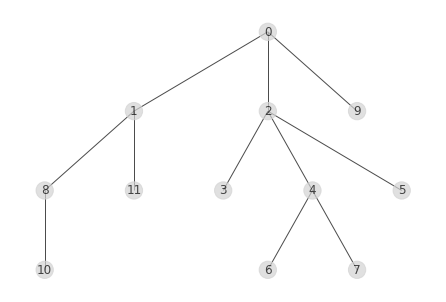

BFS:



<ipython-input-2-91200aec2a61>:84: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


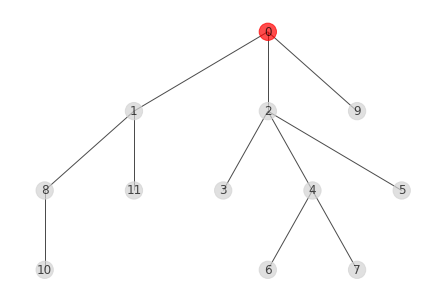

<ipython-input-2-91200aec2a61>:84: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


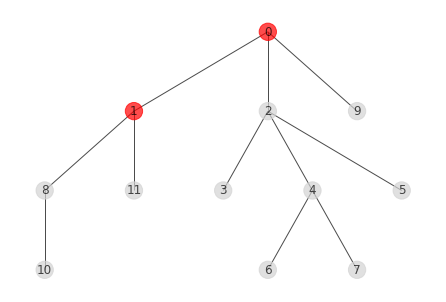

<ipython-input-2-91200aec2a61>:84: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


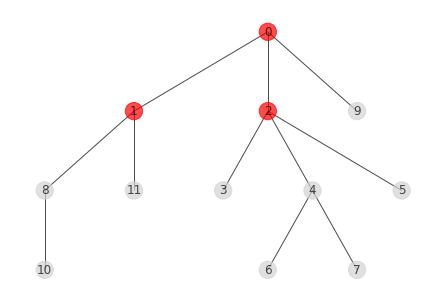

<ipython-input-2-91200aec2a61>:84: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


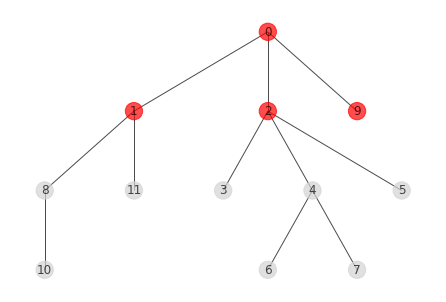

0


<ipython-input-2-91200aec2a61>:84: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


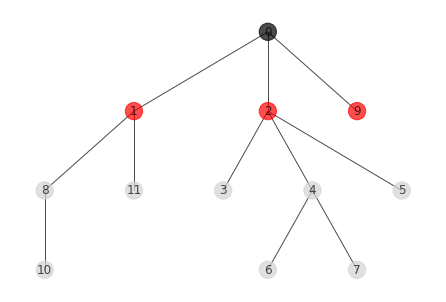

<ipython-input-2-91200aec2a61>:84: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


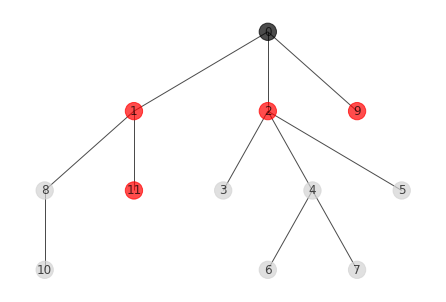

<ipython-input-2-91200aec2a61>:84: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


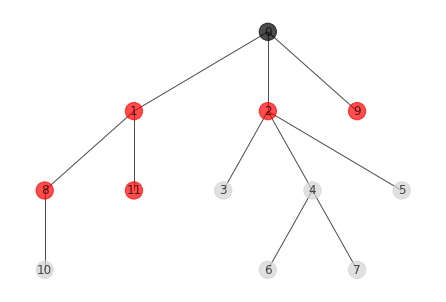

1


<ipython-input-2-91200aec2a61>:84: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


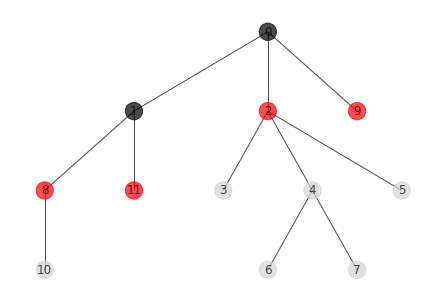

<ipython-input-2-91200aec2a61>:84: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


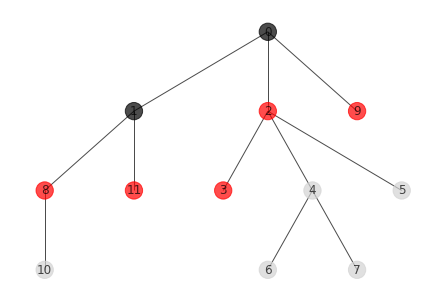

<ipython-input-2-91200aec2a61>:84: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


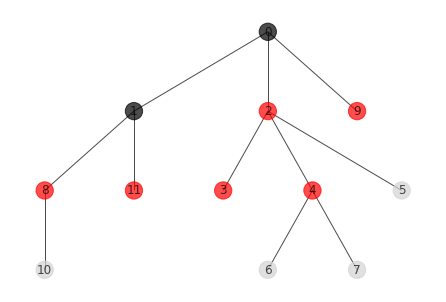

<ipython-input-2-91200aec2a61>:84: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


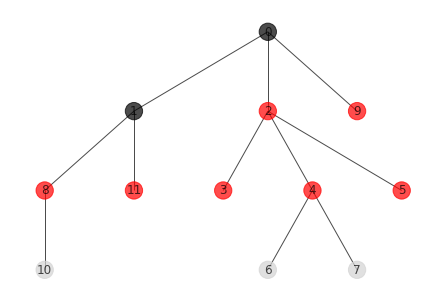

2


<ipython-input-2-91200aec2a61>:84: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


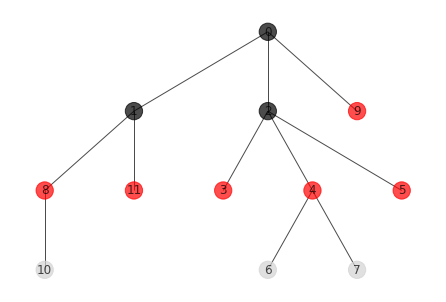

9


<ipython-input-2-91200aec2a61>:84: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


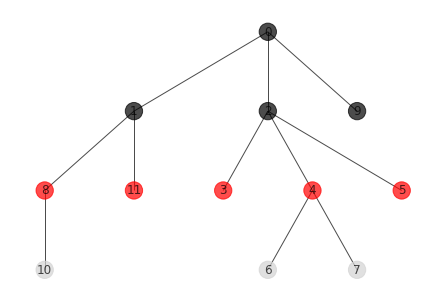

11


<ipython-input-2-91200aec2a61>:84: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


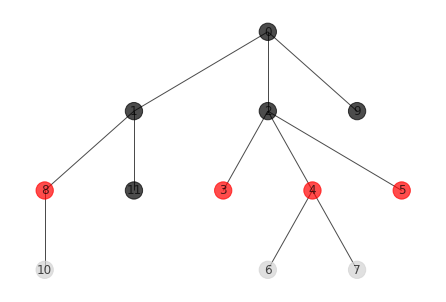

<ipython-input-2-91200aec2a61>:84: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


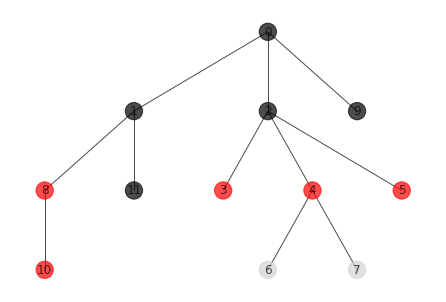

8


<ipython-input-2-91200aec2a61>:84: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


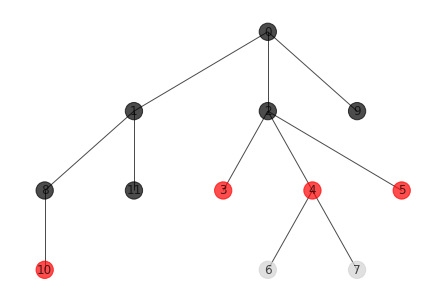

3


<ipython-input-2-91200aec2a61>:84: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


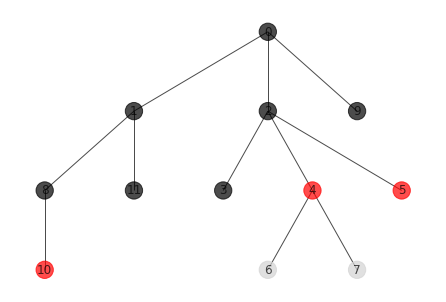

<ipython-input-2-91200aec2a61>:84: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


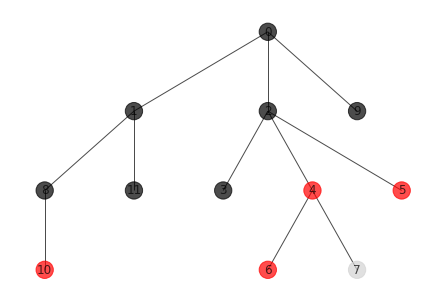

<ipython-input-2-91200aec2a61>:84: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


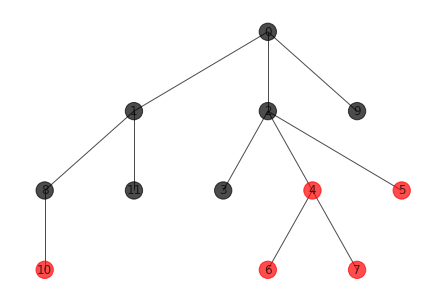

4


<ipython-input-2-91200aec2a61>:84: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


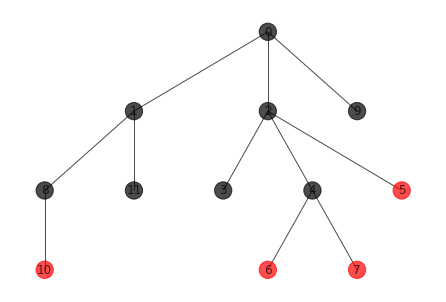

5


<ipython-input-2-91200aec2a61>:84: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


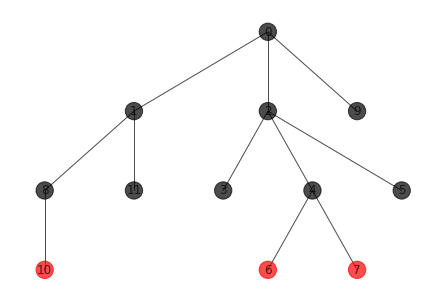

10


<ipython-input-2-91200aec2a61>:84: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


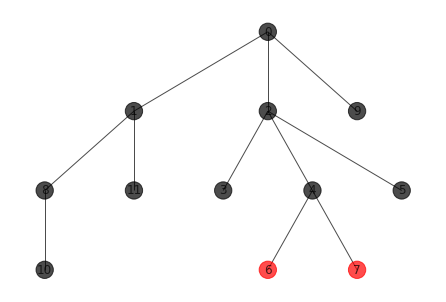

6


<ipython-input-2-91200aec2a61>:84: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


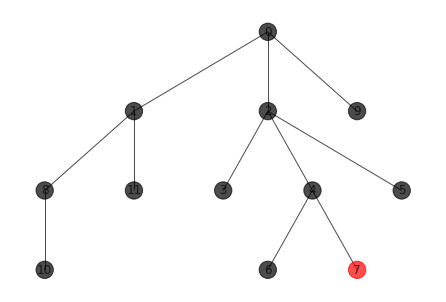

7


<ipython-input-2-91200aec2a61>:84: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


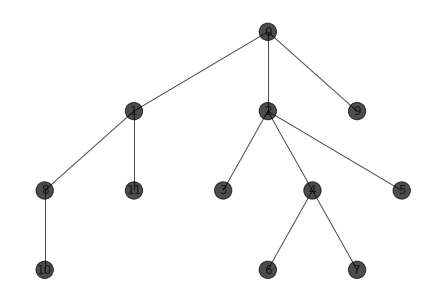

----------------
DFS:



<ipython-input-2-91200aec2a61>:84: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


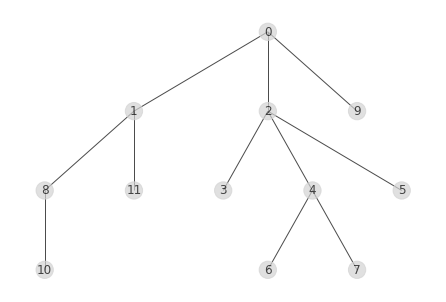

<ipython-input-2-91200aec2a61>:84: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


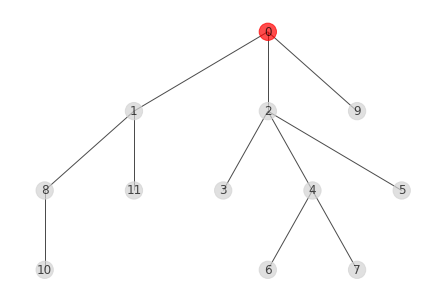

<ipython-input-2-91200aec2a61>:84: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


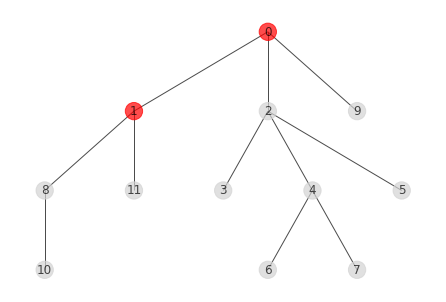

<ipython-input-2-91200aec2a61>:84: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


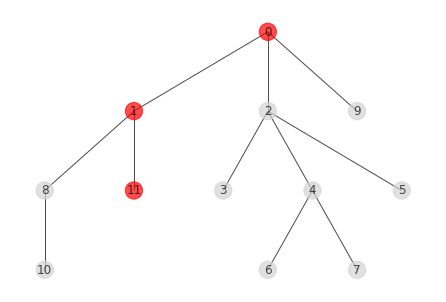

<ipython-input-2-91200aec2a61>:84: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


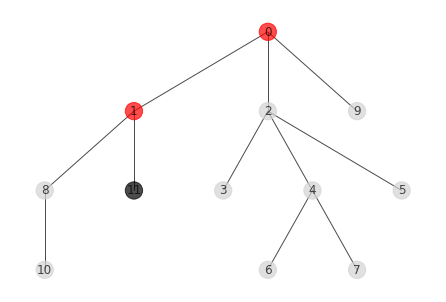

<ipython-input-2-91200aec2a61>:84: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


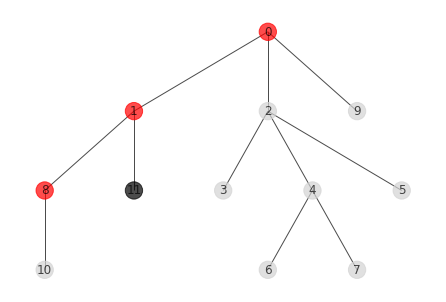

<ipython-input-2-91200aec2a61>:84: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


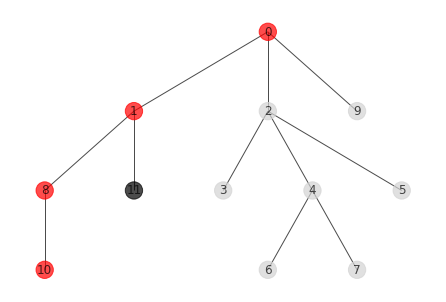

<ipython-input-2-91200aec2a61>:84: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


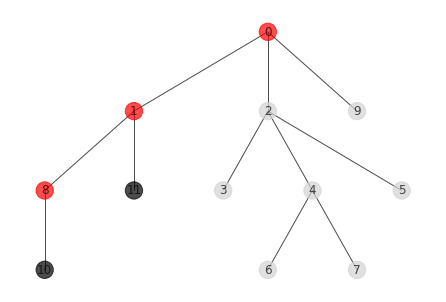

<ipython-input-2-91200aec2a61>:84: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


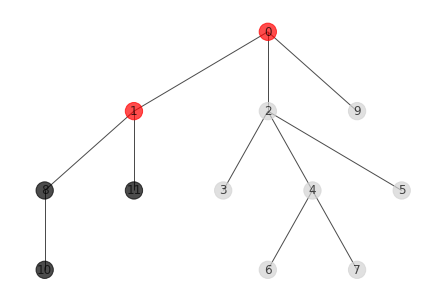

<ipython-input-2-91200aec2a61>:84: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


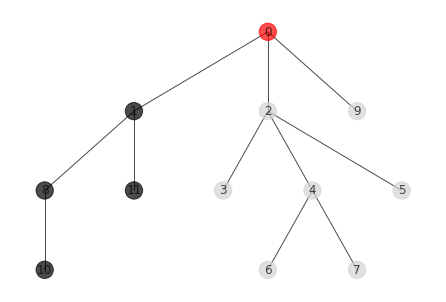

<ipython-input-2-91200aec2a61>:84: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


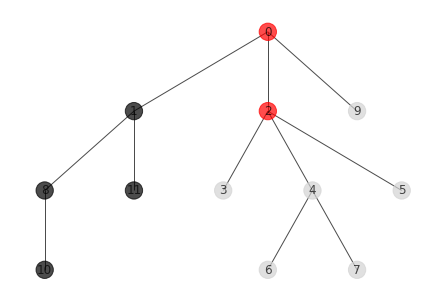

<ipython-input-2-91200aec2a61>:84: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


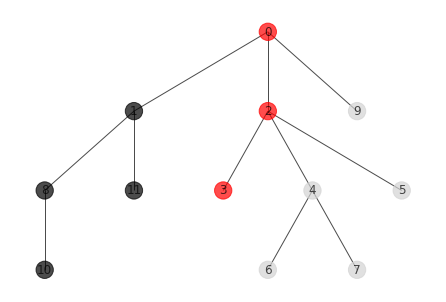

<ipython-input-2-91200aec2a61>:84: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


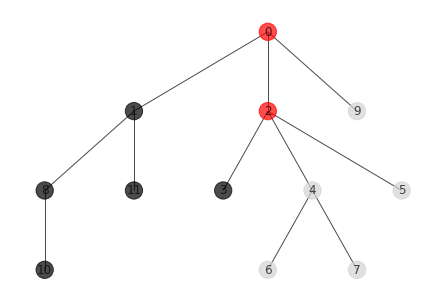

<ipython-input-2-91200aec2a61>:84: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


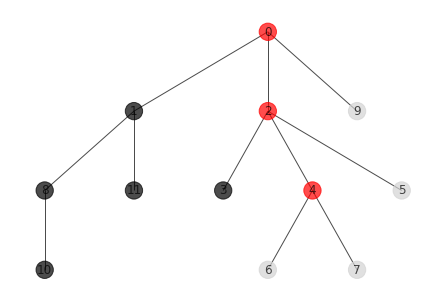

<ipython-input-2-91200aec2a61>:84: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


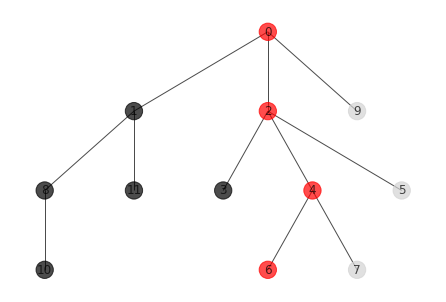

<ipython-input-2-91200aec2a61>:84: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


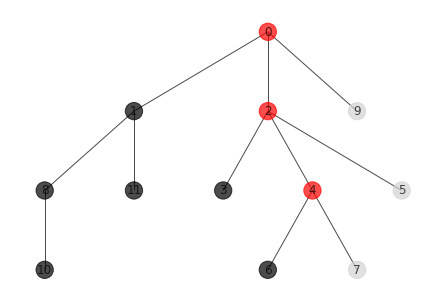

<ipython-input-2-91200aec2a61>:84: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


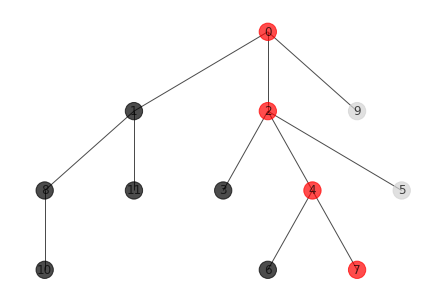

<ipython-input-2-91200aec2a61>:84: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


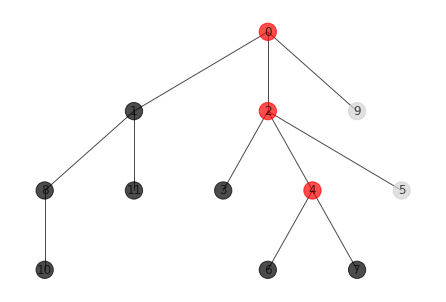

<ipython-input-2-91200aec2a61>:84: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


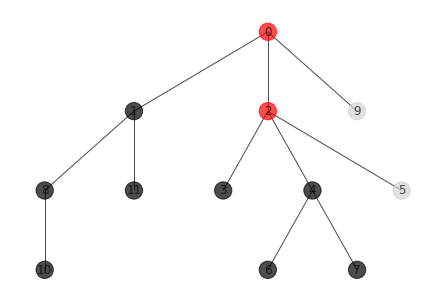

<ipython-input-2-91200aec2a61>:84: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


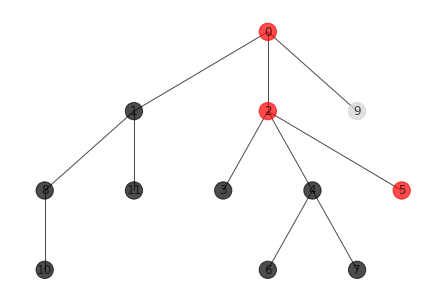

<ipython-input-2-91200aec2a61>:84: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


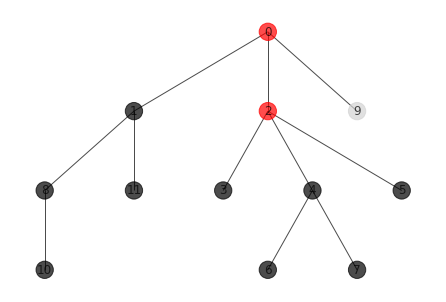

<ipython-input-2-91200aec2a61>:84: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


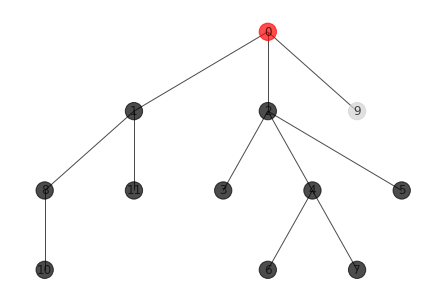

<ipython-input-2-91200aec2a61>:84: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


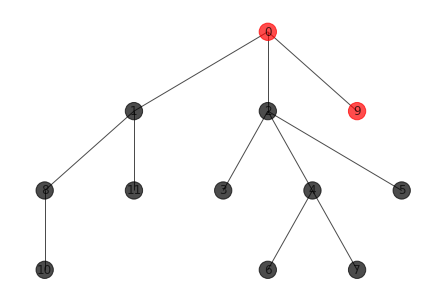

<ipython-input-2-91200aec2a61>:84: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


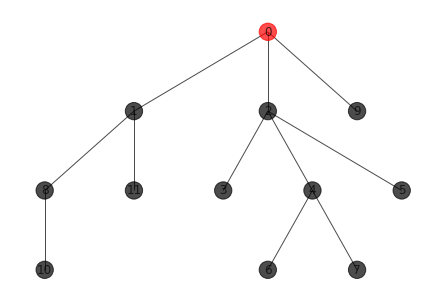

<ipython-input-2-91200aec2a61>:84: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


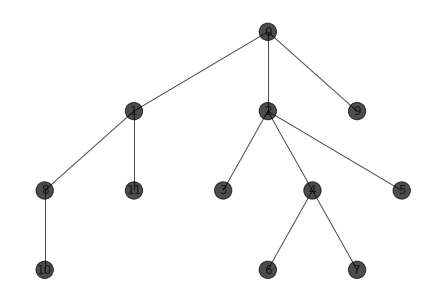

0
1
2
9
11
8
3
4
5
10
6
7
Given graph is a: TREE
ID: 0 czas: 24
ID: 1 czas: 9
ID: 2 czas: 21
ID: 3 czas: 12
ID: 4 czas: 18
ID: 5 czas: 20
ID: 6 czas: 15
ID: 7 czas: 17
ID: 8 czas: 8
ID: 9 czas: 23
ID: 10 czas: 7
ID: 11 czas: 4


In [3]:
V = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
#E = [[0,1], [0,2], [1,11], [1,8], [8,10], [2,3], [2,4], [2,5], [4,6], [4,7], [3, 11]] #cyclic graphs
#E = [[0,1], [0,2], [1,11], [1,8], [8,10], [2,3], [2,4], [2,5], [4,6], [4,7]]          #forest
E = [[0,1], [0,2], [1,11], [1,8], [8,10], [2,3], [2,4], [2,5], [4,6], [4,7], [0, 9]]   #tree
#E = [[0,1], [0,2], [1,11], [1,8], [8,10], [2,3], [2,4], [2,5], [4,6], [4,7], [3, 11], [0, 9]] #cyclic graph

object1 = Graph()
object1.add_vertices(V)
object1.add_adj_nd(E)
object1.display_non_directed()
object1.BFS(0)
print("----------------")
object1.DFS(0)

#cycle = object1.check_cycle()
#object1.check_connectivity()

typ = object1.check_type()
print("Given graph is a:", typ)

for v in object1.vertices:
  print("ID:", v.id, "czas:", v.f)